#Assignment9
Improve network accuracy by adding image augmentation- cutout

##Load libraries, data and prepare data to train model

In [69]:
#mount drive to store models
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Import libraries

from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout,GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

Data set - CIFAR 10 It has 10 classes, 

Each image have size 32X32. 

Train data has 50k images and test has 10k images.

In [44]:
#Import data
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))
print(train_features.shape)
print(test_features.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


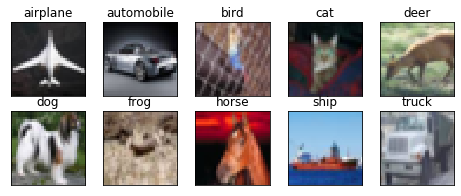

In [45]:
#plot some train examples
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:

#function to plot graph of training
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
#Accuracy function 
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
#Normalize data
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

##FIX THE ABOVE NETWORK

steps defined for assignment are


1.	remove dense

2.	add layers required to reach RF

3.	fix kernel scaleup and down (1x1)

4.	see if all dropouts are properly placed

5.	follow the guidelines we discussed in the class (

6.	Get accuracy more than the base accuracy in less number 100 epochs. Hint, you might want to use "border_mode='same',"

7.	Save File as Assignment 6A


###Redefining Model  

Model architecture is defined to reach Receptive field. Dropout is used after each conv layer. Dense layers are removed and Global Avergare pooling followed by softmax is used.



In [0]:
# Define the model
def get_model():
  model = Sequential()

  model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))#30
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.1))

  model.add(Convolution2D(48, 3, 3))#28
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.1))

  model.add(Convolution2D(48, 3, 3, border_mode='same'))#26
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.1))

  model.add(MaxPooling2D(pool_size=(2, 2)))#13

  model.add(Convolution2D(96, 3, 3))#11
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.1))

  model.add(Convolution2D(96, 3, 3))#9
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.1))

  model.add(Convolution2D(96, 3, 3, border_mode='same'))#7
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.1))

  model.add(Convolution2D(96, 7, 7, border_mode='same'))#1
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.1))

  model.add(Convolution2D(10,1,1))
  model.add(GlobalAveragePooling2D())

  model.add(Activation('softmax'))
  return model





##Train model without cutout
Model took 1241.09 seconds to train

**Accuracy on test data is: 87.79**

In [0]:
model_nco=get_model()
model_nco.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


train_datagen = ImageDataGenerator(featurewise_center = True, 
                                   featurewise_std_normalization = True,
                                   rotation_range = 10,
                                   zoom_range = 0.10,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1
                                   )
test_datagen = ImageDataGenerator(featurewise_center = True, featurewise_std_normalization = True)
train_datagen.fit(train_features)
test_datagen.fit(test_features)

train_data_iter = train_datagen.flow(train_features,train_labels, batch_size = 128)
test_data_iter =  test_datagen.flow(test_features,test_labels, batch_size = 10000)

CKPT = ModelCheckpoint(filepath = 'drive/My Drive/best_model_nco.hdf5', monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max', period=1)


# train the model
start = time.time()
# Train the model
model_info = model_nco.fit_generator(train_data_iter,
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = test_data_iter.next(), verbose=1, callbacks = [CKPT])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))


model_nco.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), pa

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`




Epoch 1/50
390/390 [==============================] - 29s 74ms/step - loss: 1.3332 - acc: 0.5167 - val_loss: 1.0964 - val_acc: 0.6154

Epoch 00001: val_acc improved from -inf to 0.61540, saving model to drive/My Drive/best_model_nco.hdf5
Epoch 2/50
390/390 [==============================] - 25s 65ms/step - loss: 0.9393 - acc: 0.6682 - val_loss: 0.9245 - val_acc: 0.6669

Epoch 00002: val_acc improved from 0.61540 to 0.66690, saving model to drive/My Drive/best_model_nco.hdf5
Epoch 3/50
390/390 [==============================] - 25s 64ms/step - loss: 0.7814 - acc: 0.7266 - val_loss: 0.8594 - val_acc: 0.7144

Epoch 00003: val_acc improved from 0.66690 to 0.71440, saving model to drive/My Drive/best_model_nco.hdf5
Epoch 4/50
390/390 [==============================] - 25s 64ms/step - loss: 0.6952 - acc: 0.7582 - val_loss: 1.1165 - val_acc: 0.6465

Epoch 00004: val_acc did not improve from 0.71440
Epoch 5/50
390/390 [==============================] - 25s 65ms/step - loss: 0.6392 - acc: 0.7

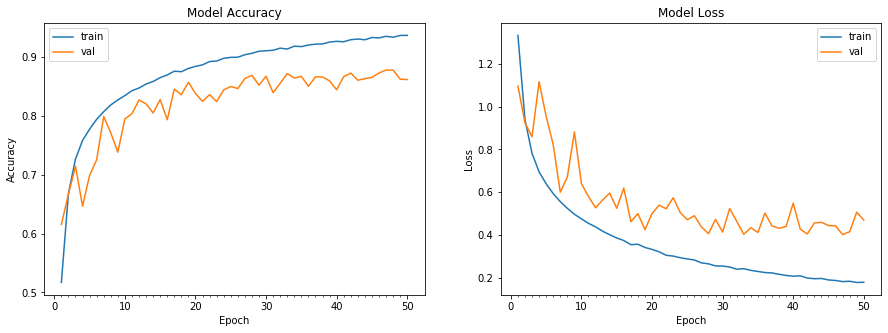

Accuracy on test data is: 87.79


In [0]:
# plot model history
plot_model_history(model_info)
#save model
model_nco.save('drive/My Drive/best_model_nco.h5')
# compute test accuracy
model_nco.load_weights('drive/My Drive/best_model_nco.hdf5')
test_features, test_labels = test_data_iter.next()
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_nco))

##gradcam result for model

https://www.hackevolve.com/where-cnn-is-looking-grad-cam/

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys

def gradcam(image,model, layer_name):
  preds = model.predict(image)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer(layer_name)

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([image])

 # print("--------",pooled_grads_value)
  for i in range(pooled_grads_value.shape[0]):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  heatmap = cv2.resize(heatmap, (32,32))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)


  return heatmap

#plt.imshow(gradcam(train_features[67].reshape([-1,32,32,3]), model_nocutout, 'conv2d_24'))

##Plot gradcam heatmap for model without cutout

In [0]:
(train_features_1, train_labels_1), (test_features_1, test_labels_1) = cifar10.load_data()
test_features_scaled = test_features_1.astype('float32')/255
test_labels_1 = np_utils.to_categorical(test_labels_1, num_classes)
test_datagen.fit(test_features_scaled)

test_features = test_datagen.standardize(test_features_scaled)

In [0]:
actuals = np.argmax(test_labels_1, axis = 1)
preds = np.argmax(model_nco.predict(test_features), axis = 1)

correct_idx = [idx for idx in range(10000) if actuals[idx] == preds[idx]]
incorrect_idx = [idx for idx in range(10000) if idx not in correct_idx]

correct_plot_idx = np.random.choice(correct_idx, size = 12, replace = False)

In [0]:
model_nco.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
batch_normalization_9 (Batch (None, 30, 30, 48)        192       
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 48)       

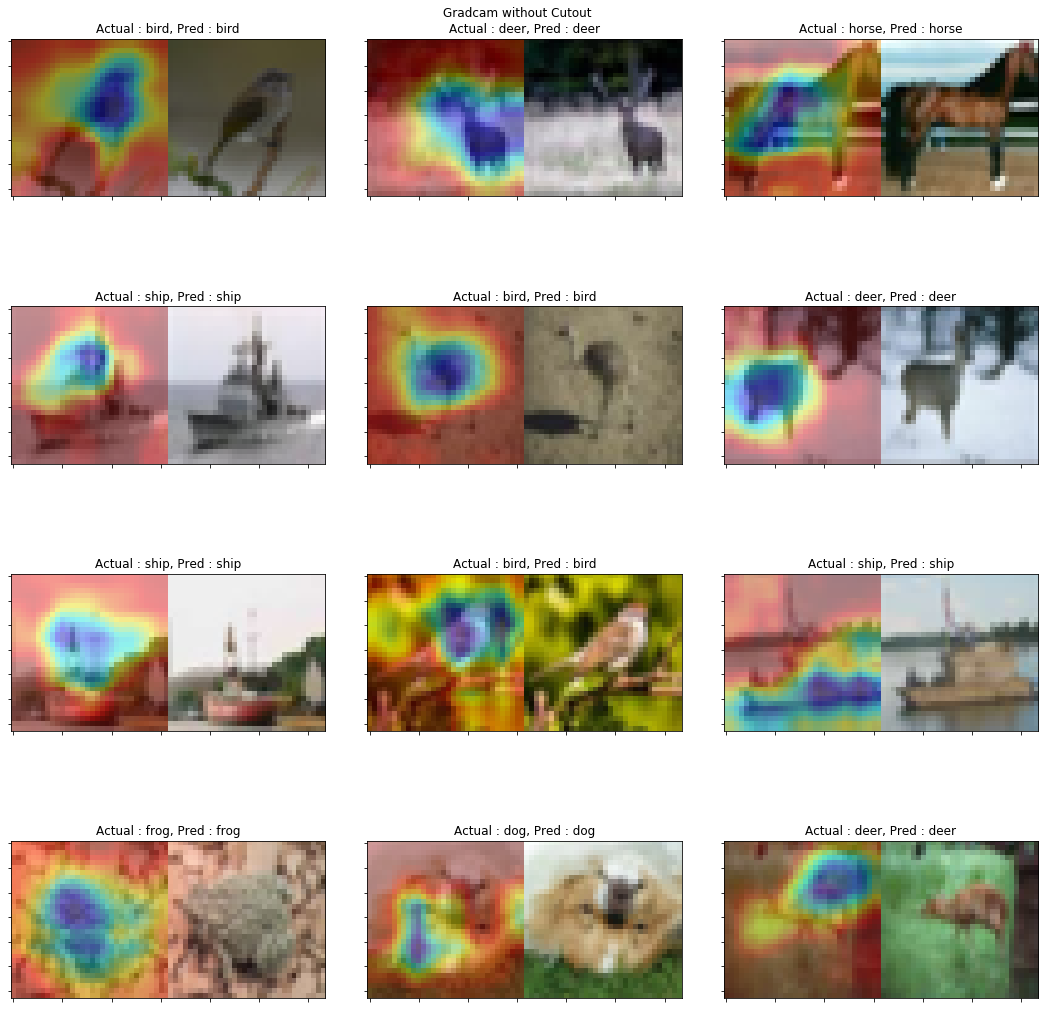

In [0]:
fig, ax = plt.subplots(4,3, figsize = (15,15))
fig.tight_layout()
fig.suptitle("Gradcam without Cutout")

plot_idx = 0

for i in range(4):
  for j in range(3):
    img = test_features[correct_plot_idx[plot_idx]].reshape([-1,32,32,3])
    
    unnormalized_img = test_features_1[correct_plot_idx[plot_idx]]
    
    heatmap = gradcam(img, model_nco, "conv2d_16")
    superimposed_img = cv2.addWeighted(unnormalized_img, 0.6, heatmap, 0.4, 0, dtype = cv2.CV_32F)/255
    
    true_class = class_names[actuals[correct_plot_idx[plot_idx]]]
    pred_class = class_names[preds[correct_plot_idx[plot_idx]]]
    plot_idx += 1
    plot_img = np.concatenate((superimposed_img, unnormalized_img/255), axis = 1)
    ax[i, j].imshow(plot_img)
    ax[i, j].set_xticklabels([])
    ax[i, j].set_yticklabels([])
    ax[i, j].set_title("Actual : {}, Pred : {}".format(true_class, pred_class))
    
    
plt.show()

##Implementing cutout function

In [0]:
import numpy as np
from keras.preprocessing import image

def get_random_eraser(s_l=0.1, s_h=0.3, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
       



        s = np.random.uniform(s_l, s_h) * img_h * img_w
        r = np.random.uniform(r_1, r_2)
        w = int(np.sqrt(s / r))
        h = int(np.sqrt(s * r))

        if w==32:
          left=0
        else:
          left = np.random.randint(0, img_w)

        if h==32:
          top=0
        else:
          top = np.random.randint(0, img_h)

            #if left + w <= img_w and top + h <= img_h:
               # break

        if pixel_level:
            mean = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            for c in range(img_c):
              mean = np.mean(input_img[top:top + h, left:left + w, c])
              input_img[top:top + h, left: left + w, c] = mean

        

        return input_img

    return eraser

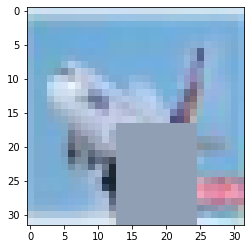

In [53]:
eraser=get_random_eraser()
plt.imshow(eraser(train_features[344]))

##Train model with cutout augmentation
Model took 2283.94 seconds to train
**Accuracy on test data is: 87.12**

In [54]:

model_cutout=get_model()
model_cutout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train_datagen = ImageDataGenerator(featurewise_center = True, 
                                   featurewise_std_normalization = True,
                                   rotation_range = 10,
                                   zoom_range = 0.10,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   preprocessing_function = get_random_eraser())
test_datagen = ImageDataGenerator(featurewise_center = True, featurewise_std_normalization = True)
train_datagen.fit(train_features)
test_datagen.fit(test_features)

train_data_iter = train_datagen.flow(train_features,train_labels, batch_size = 128)
test_data_iter =  test_datagen.flow(test_features,test_labels, batch_size = 10000)

CKPT = ModelCheckpoint(filepath = 'drive/My Drive/best_model_cutout.hdf5', monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max', period=1)


# train the model
start = time.time()
# Train the model
model_info = model_cutout.fit_generator(train_data_iter,
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = test_data_iter.next(), verbose=1, callbacks = [CKPT])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
model_cutout.save("drive/My Drive/best_model_cutout.h5")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), padding="same")`
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (7, 7), padding="same")`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`




Epoch 1/50
390/390 [==============================] - 51s 132ms/step - loss: 1.4416 - acc: 0.4756 - val_loss: 1.3299 - val_acc: 0.5188

Epoch 00001: val_acc improved from -inf to 0.51880, saving model to drive/My Drive/best_model_cutout.hdf5
Epoch 2/50
390/390 [==============================] - 45s 116ms/step - loss: 1.0890 - acc: 0.6169 - val_loss: 0.9950 - val_acc: 0.6493

Epoch 00002: val_acc improved from 0.51880 to 0.64930, saving model to drive/My Drive/best_model_cutout.hdf5
Epoch 3/50
390/390 [==============================] - 45s 117ms/step - loss: 0.9414 - acc: 0.6672 - val_loss: 0.8764 - val_acc: 0.7072

Epoch 00003: val_acc improved from 0.64930 to 0.70720, saving model to drive/My Drive/best_model_cutout.hdf5
Epoch 4/50
390/390 [==============================] - 45s 116ms/step - loss: 0.8548 - acc: 0.7014 - val_loss: 1.1926 - val_acc: 0.6305

Epoch 00004: val_acc did not improve from 0.70720
Epoch 5/50
390/390 [==============================] - 46s 117ms/step - loss: 0.7

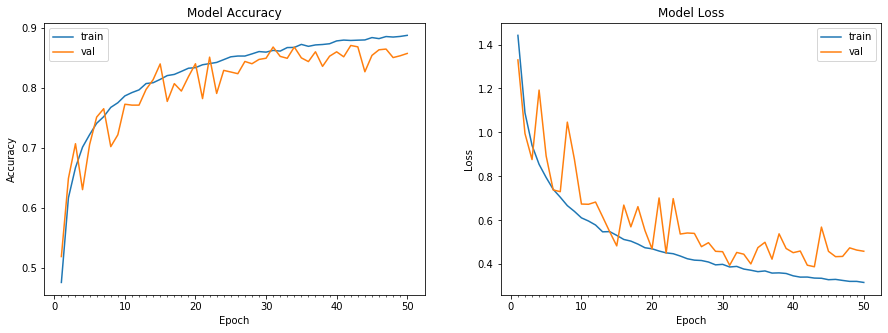

Accuracy on test data is: 87.12


In [58]:
# plot model history
plot_model_history(model_info)

# compute test accuracy
model_cutout.load_weights('drive/My Drive/best_model_cutout.hdf5')
test_features_n, test_labels_n = test_data_iter.next()
print ("Accuracy on test data is: %0.2f"%accuracy(test_features_n, test_labels_n, model_cutout))

In [56]:
model_cutout.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 48)        192       
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)       

##Gradcam result with cutout model

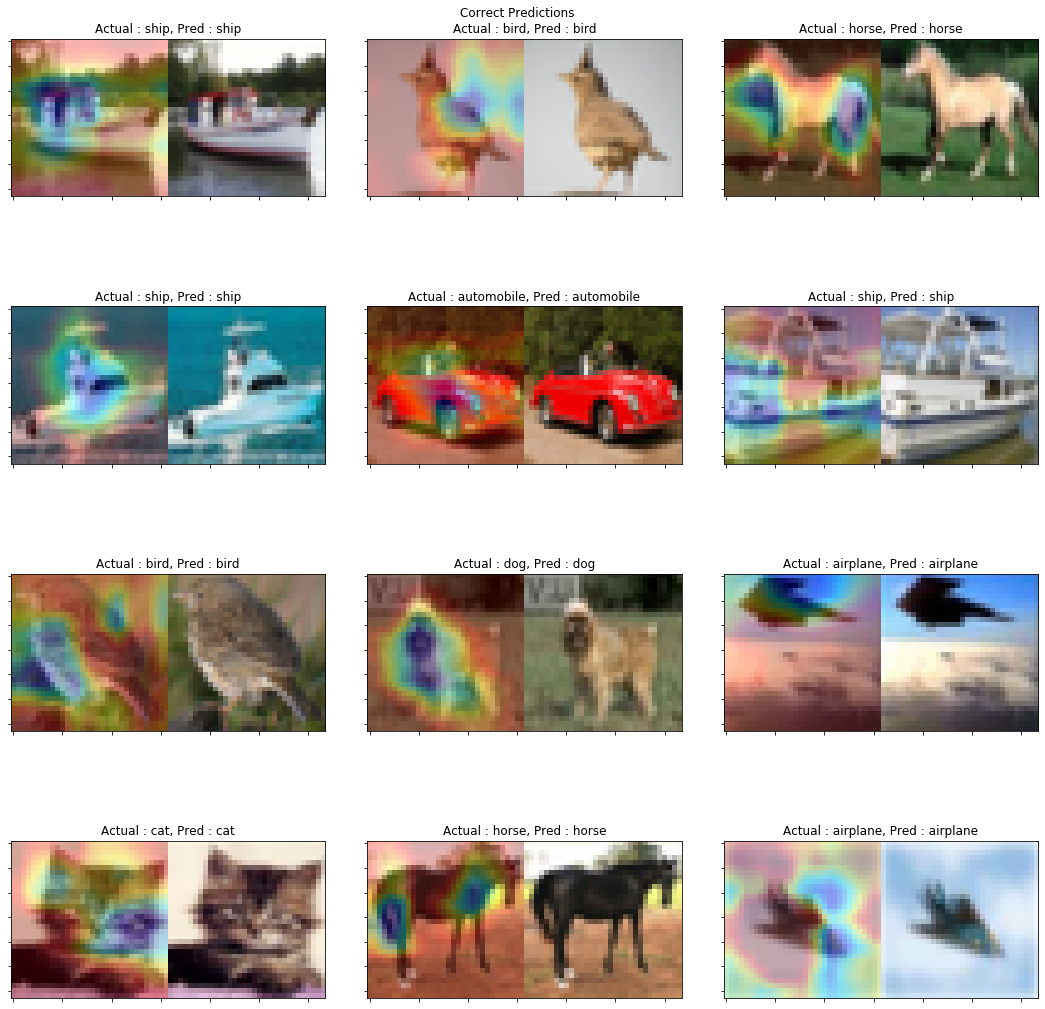

In [62]:
actuals = np.argmax(test_labels_1, axis = 1)
preds = np.argmax(model_cutout.predict(test_features), axis = 1)

correct_idx = [idx for idx in range(10000) if actuals[idx] == preds[idx]]
incorrect_idx = [idx for idx in range(10000) if idx not in correct_idx]

correct_plot_idx = np.random.choice(correct_idx, size = 12, replace = False)
#incorrect_plot_idx = np.random.choice(incorrect_idx, size = 12, replace = False)

fig, ax = plt.subplots(4,3, figsize = (15,15))
fig.tight_layout()
fig.suptitle("Correct Predictions")

plot_idx = 0

for i in range(4):
  for j in range(3):
    img = test_features[correct_plot_idx[plot_idx]].reshape([-1,32,32,3])
    
    unnormalized_img = test_features_1[correct_plot_idx[plot_idx]]
    
    heatmap = gradcam(img, model_cutout, "conv2d_8")
    
    superimposed_img = cv2.addWeighted(unnormalized_img, 0.7, heatmap, 0.3, 0, dtype = cv2.CV_32F)/255
    
    true_class = class_names[actuals[correct_plot_idx[plot_idx]]]
    pred_class = class_names[preds[correct_plot_idx[plot_idx]]]
    plot_idx += 1
    plot_img = np.concatenate((superimposed_img, unnormalized_img/255), axis = 1)
    ax[i, j].imshow(plot_img)
    ax[i, j].set_xticklabels([])
    ax[i, j].set_yticklabels([])
    ax[i, j].set_title("Actual : {}, Pred : {}".format(true_class, pred_class))

##Gradcam result without cutout

In [67]:
import keras
model_nocutout=keras.models.load_model('drive/My Drive/best_model_nco.h5')
model_nocutout.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
batch_normalization_9 (Batch (None, 30, 30, 48)        192       
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 48)       

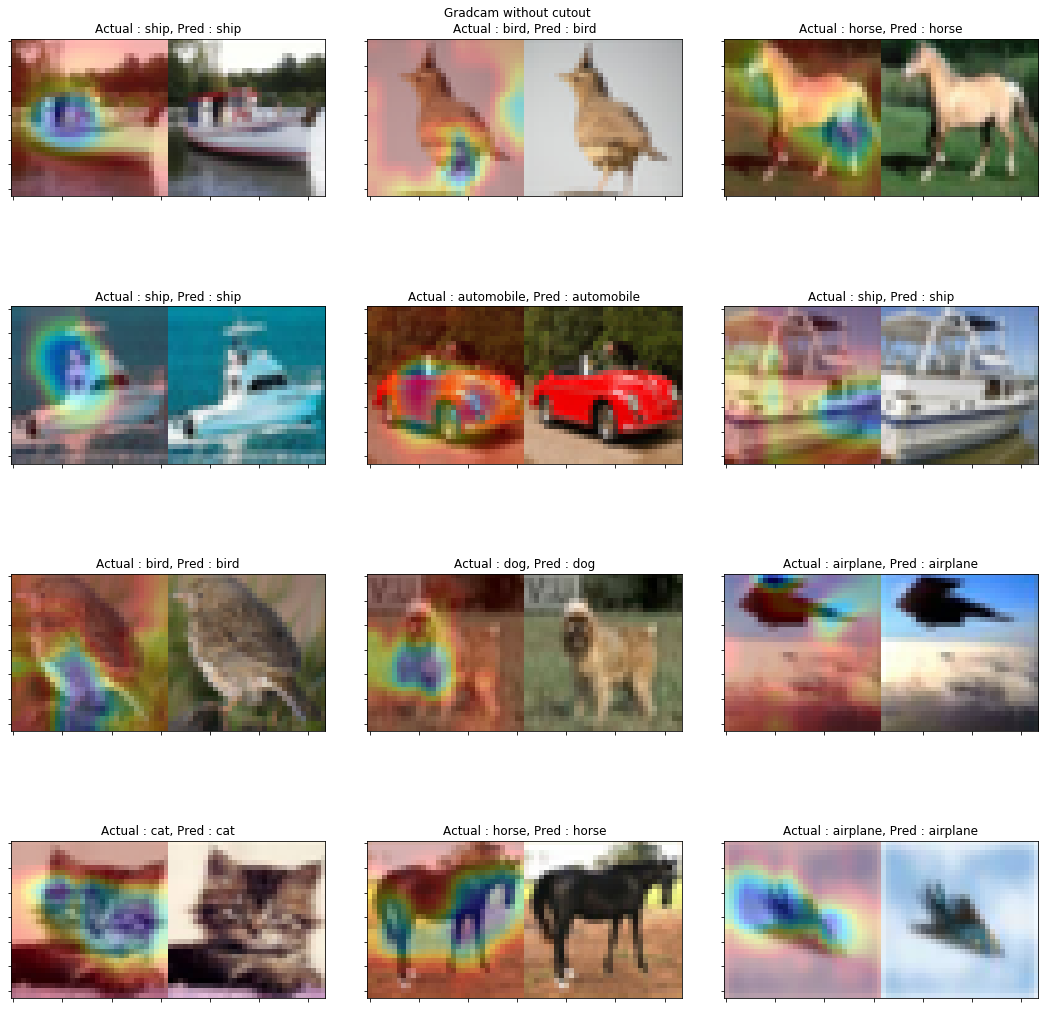

In [68]:


fig, ax = plt.subplots(4,3, figsize = (15,15))
fig.tight_layout()
fig.suptitle("Gradcam without cutout")

plot_idx = 0

for i in range(4):
  for j in range(3):
    img = test_features[correct_plot_idx[plot_idx]].reshape([-1,32,32,3])
    
    unnormalized_img = test_features_1[correct_plot_idx[plot_idx]]
    
    heatmap = gradcam(img, model_nocutout, "conv2d_16")
    
    superimposed_img = cv2.addWeighted(unnormalized_img, 0.7, heatmap, 0.3, 0, dtype = cv2.CV_32F)/255
    
    true_class = class_names[actuals[correct_plot_idx[plot_idx]]]
    pred_class = class_names[preds[correct_plot_idx[plot_idx]]]
    plot_idx += 1
    plot_img = np.concatenate((superimposed_img, unnormalized_img/255), axis = 1)
    ax[i, j].imshow(plot_img)
    ax[i, j].set_xticklabels([])
    ax[i, j].set_yticklabels([])
    ax[i, j].set_title("Actual : {}, Pred : {}".format(true_class, pred_class))